# Intro to machine learning with scikit-learn

https://scikit-learn.org/stable/tutorial/basic/tutorial.html

``` mermaid
%%{init: {"mindmap"}%%
mindmap
        root((ML))
            id(**Supervised** problems: Learn link between observed and target datasets)
                id(Classification bases on)
                    [target type]
                        [Finite labels]
                        [**Regression** into continuous variable]
                    [estimators]
                        [**KNN**: K-nearest neighbors classifiers]
            id(**Unsupervised** problems)
```

2 categories of learning problems:
- Supervised: To learn the link between two datasets, X (observed data) and y(target, label).
  - Classification based on target type:
      - Classification into finite labels.
      - Regression into a continuous variable.
 
  - Classification based on estimators:
      - k-Nearest neighbors classifiers (KNN)
- Unsupervised

Data is divided into two data sets:
- Training set
- Testing set

In [4]:
from sklearn import datasets
iris = datasets.load_iris()
digits = datasets.load_digits()

In [5]:
print(digits.data) #n_samples, n_features array
print('Samples: ',len(digits.data))
print('Features: ', len(digits.data[0]))
print('shape: ', digits.data.shape)
print(digits.DESCR)
print('ground truth for each sample: ', len(digits.target), digits.target)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
Samples:  1797
Features:  64
shape:  (1797, 64)
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprint

In [6]:
digits.images[0] # 8x8 image
# In this case, each feature is the value of each pixel.

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

images shapes:  (1797, 8, 8)


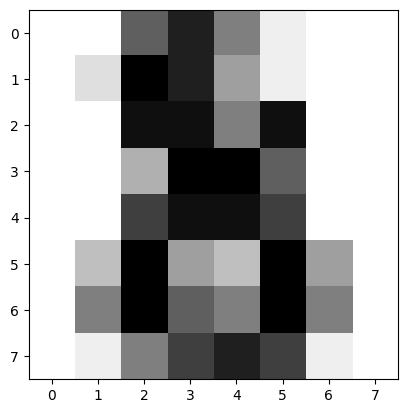

In [7]:
print('images shapes: ', digits.images.shape)
import matplotlib.pyplot as plt
plt.imshow(digits.images[-1],
           cmap=plt.cm.gray_r)

We are given samples of each of the possible classes (in this case, images for 0, for 1, etc). With those samples, we fit an estimator. That estimator is going to help us predict the classes of yet unseen samples: it learns from data.

- Samples -> fit -> estimator -> prediction

The estimator object implements `fit(samples, correct_values)` [particularly for the case of supervised learning) and `predict(T)`. There are several estimators already implemented in sklearn, and their parameters are set as arguments on their constructors. Most can be modified later. Example: SVC, Support Vector Machine.

In [8]:
from sklearn import svm
# The estimator is SVC, the parameters here are set manually
clf = svm.SVC(gamma=0.001, C=100.)
clf.gamma

0.001

In [9]:
training_set = digits.data[:-1]
training_targets = digits.target[:-1]

# We fit the estimator using fit() with the corresponding training set
clf.fit(X=training_set, y=training_targets)

SVC(C=100.0, gamma=0.001)

In [11]:
# Now we can predict
clf.predict(digits.data[-1:])

array([8])

We use `float64` when possible, but many estimators will work with `float32` if the input values are `float32`. Lower memmory usage, higher numerical instability.

In [12]:
iris = datasets.load_iris()
clf = svm.SVC()
clf.fit(iris.data, iris.target)

SVC()

In [13]:
clf.predict(iris.data[:3])

array([0, 0, 0])

In [14]:
clf.fit(iris.data, iris.target_names[iris.target])

SVC()

Classification into classes with names

In [16]:
clf.predict(iris.data[:3])

array(['setosa', 'setosa', 'setosa'], dtype='<U10')

## Updating parameters + refitting

In [17]:
clf = svm.SVC()
clf.set_params(kernel='linear').fit(iris.data, iris.target)

SVC(kernel='linear')

In [18]:
clf.predict(iris.data[:5])

array([0, 0, 0, 0, 0])

In [19]:
clf.set_params(kernel='rbf').fit(iris.data, iris.target)

SVC()

In [20]:
clf.predict(iris.data[:5])

array([0, 0, 0, 0, 0])

## Nearest neighbor, curse of dimensionality

In [26]:
import numpy as np

In [27]:
np.unique(iris.target)

array([0, 1, 2])

In [28]:
np.random.seed(0)
indices = np.random.permutation(len(iris.target)) #permutes np.array(len(iris.target))

In [29]:
# Define training set, first ones except for ten after permuting
iris_X_train = iris.data[indices[:-10]]
iris_y_train = iris.target[indices[:-10]]

# Define test set, the last 10
iris_X_test = iris.data[indices[-10:]]
iris_y_test = iris.target[indices[-10:]]

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn

KNeighborsClassifier()

In [31]:
knn.fit(X=iris_X_train, y=iris_y_train)

KNeighborsClassifier()

In [32]:
print('estimated:' ,knn.predict(iris_X_test))
print('targets:  ' ,iris_y_test)

estimated: [1 2 1 0 0 0 2 1 2 0]
targets:   [1 1 1 0 0 0 2 1 2 0]


In [33]:
iris_df = datasets.load_iris(as_frame=True)

In [34]:
X_df = iris_df.data[["sepal length (cm)", "sepal width (cm)"]]
X_df

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [35]:
from sklearn.model_selection import train_test_split
y_df = iris_df.target
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, stratify=y_df, random_state=0)
print('train set: ',X_train.shape, '\ntest_set: ',X_test.shape)

train set:  (112, 2) 
test_set:  (38, 2)


In [36]:
knn = KNeighborsClassifier()
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier()

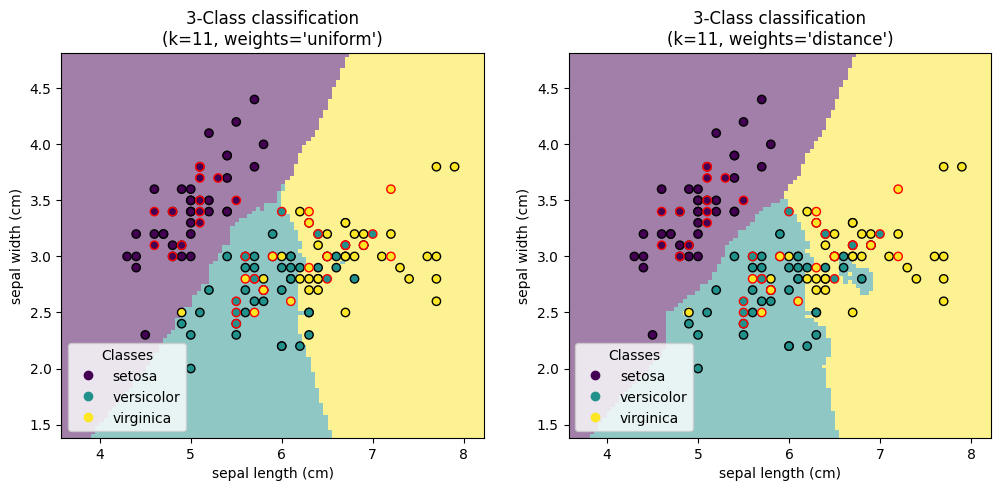

In [120]:
from sklearn.inspection import DecisionBoundaryDisplay

_, axs = plt.subplots(ncols=2, figsize=(12, 5))

for ax, weights in zip(axs, ("uniform", "distance")):
    # We will train in two different modes the knn:
    # - uniform: all nearest neighbors will have the same impact on the decision
    # - distance: weight given to each neighbor is proportional to the inverse of
    #             the distance from that neighbor to the query point
    
    knn.set_params(weights=weights, n_neighbors=11).fit(X=X_train, y=y_train)
    # We display the boundaries, with different colors
    disp = DecisionBoundaryDisplay.from_estimator(
        knn,
        X_test,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    # We display all test and training data
    scatter = disp.ax_.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, edgecolors="k")
    scatter = disp.ax_.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, edgecolors="r")
    # We muust set the legend
    disp.ax_.legend(
        scatter.legend_elements()[0],
        iris.target_names,
        loc="lower left",
        title="Classes",
    )
    _ = disp.ax_.set_title(
        f"3-Class classification\n(k={knn.n_neighbors}, weights={weights!r})"
    )

plt.show()

## Linear model

In [37]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
# We separate into train an test sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test  = diabetes_X[-20:]
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test  = diabetes_y[-20:]

In [38]:
diabetes_X.shape

(442, 10)

We expect to use a linear model to fit the data: x: parameter value, y: target variable. We must fit coefficients $b_0$ and $b_1$ for $$y=b_0+b_1*X+\epsilon$$

In [41]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression()

In [42]:
print('b_n: ', regr.coef_)

b_n:  [ 3.06094248e-01 -2.37635570e+02  5.10538048e+02  3.27729878e+02
 -8.14111926e+02  4.92799595e+02  1.02841240e+02  1.84603496e+02
  7.43509388e+02  7.60966464e+01]


In [43]:
print('b_0: ', regr.intercept_)

b_0:  152.76429169049118


We can calculate the mean square error, MSE, by predicting and comparing to the expected values (target)

In [75]:
np.mean((regr.predict(diabetes_X_test) - diabetes_y_test)**2)

2004.5186863342092

We can calculate its score ($R^2$)

In [44]:
regr.score(diabetes_X_test, diabetes_y_test)

0.585085427447195

# Classification
https://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html#classification

# Transformers and pre-processors

Machine learning workflow: Pipeline of different steps: pre-processing, transforms, prediction.

Pre-processors and transformers follow the same API as estimators, but instead of having a _predict_ method, they have a _transform_ method.

Instead of importing an estimator, we have to import a preprocessing library.

If we want to apply different transformations to different predictors/columns, we need to use `ColumnTransformer`.

## Standard Scaler

In [45]:
from sklearn.preprocessing import StandardScaler

X = [[0, 15],
     [1, -10]]

my_std_scaler = StandardScaler()

Output of a transformer is an array of n samples (2 rows in this case, one per sample) and the number of columns fixed after fitting.

In [46]:
my_std_scaler.fit(X)

StandardScaler()

What does the StandardScaler in this case does?

It removes the mean and scales to unit variance, so $Z=(x-u)/s$.
$u$ is the mean of the training samples.
$s$ is the standard deviation of the samples.

So for each sample, it calculates the mean and the std, and normalizes the value of X into Xt, independently on each feature.

When we call `fit()`, the mean and std are calculated. When we call `transform()`, the transform is applied.

In [48]:
print('mean: ', my_std_scaler.mean_)
print('var: ', my_std_scaler.var_)
print('scale (sqrt(var)): ', my_std_scaler.var_)

mean:  [0.5 2.5]
var:  [  0.25 156.25]
scale (sqrt(var)):  [  0.25 156.25]


In [49]:
Xt = my_std_scaler.fit(X).transform(X)
Xt

array([[-1.,  1.],
       [ 1., -1.]])

In [50]:
X

[[0, 15], [1, -10]]

In [51]:
(0-0.5)/np.sqrt(0.25)

-1.0

In [52]:
(15-2.5)/np.sqrt(156.25)

1.0

In [53]:
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])
scaler = StandardScaler().fit(X_train)
print('mean: ', scaler.mean_)
print('scale: ', scaler.scale_)
print('var: ', scaler.var_)
X_scaled = scaler.transform(X_train)
X_scaled

mean:  [1.         0.         0.33333333]
scale:  [0.81649658 0.81649658 1.24721913]
var:  [0.66666667 0.66666667 1.55555556]


array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

I want to do this by hand.

In [54]:
(0-1)/0.66

-1.5151515151515151

## MinMaxScaler and MaxAbsScaler

MinMaxScaler transforms each feature individually to make it fit into a range.
$$X_{std} = (X - Xmin) / (max - Xmin)$$
$$X_{scaled} = X_{std} * (max - min) + min$$


In [55]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
x_train_minmax = min_max_scaler.fit_transform(X_train)
x_train_minmax

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

## Pipelines

Is a way for chaining transformers and predictors, having all the same API calls as a regular estimator (`fit` and `predict`, and `transform` would he handled internally). Is important also to, in some cases, prevent leakeage.

In [ ]:
import sklearn
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

pipeline = sklearn.pipeline.make_pipeline(sklearn.preprocessing.StandardScaler(),
                                          sklearn.linear_model.LogisticRegression()
            )

X, y = load_iris(return_X_y=True)
# split training and testing data, and prevent leakeage
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=0)

# fit the pipeline using the same api as for estimators.
pipeline.fit(X_train, y_train)


In [164]:
sklearn.metrics.accuracy_score(pipeline.predict(X_test), y_test)

0.9736842105263158

# Model Evaluation

## Cross-validation

![](https://scikit-learn.org/stable/_images/grid_search_workflow.png)

Besides training and testing set, as hyperparameters of the estimator can be tweaked until the performance is optimal, and therefore leak knowledge from the test set into the model selection, a _validation set_ is sometimes defined.

Therefore:
training proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be done on the test set.

- Training set -> to train the model and define the parameters
- Validation set -> To check the hyperparameters while continuously using the training set.
- Testing set -> to check the parameters+hypterparameters of the training set.

This division of the set into three different subsets diminishes the amount of available data for training. For this, a common solution is Cross Validation: We don't use a Validation Set.

- k-fold CV: Divide the training set into k smaller sets (folds).
    - Train on k-1 folds.
    - Validate the model on the remaining fold.
    - Repeat with differents folds being left out as a testing fold (`for` structure).
    - Calculate the mean of the performance measurement used.
 
![](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [181]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1, random_state=42)

# We calculate the cross validation score using the training data and the estimator
scores = cross_val_score(clf, X_train, y_train, cv=7) #Calculated 5 consecutive times. using a kfold.
print('scores: ', scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


scores:  [1.     1.     1.     1.     1.     0.9375 0.9375]
0.98 accuracy with a standard deviation of 0.03


In [182]:
from sklearn.model_selection import cross_validate
# We create a random regression problem with make_regression, using 1000 samples.
X, y = sklearn.datasets.make_regression(n_samples=1000, random_state=0)
lr = sklearn.linear_model.LinearRegression()

# We could just train the model as it is, using lr.fit(X,y) and calculate some scores,
# but we could use cross_validate to more efficiently use the dataset.

result = cross_validate(lr, X, y) # defaulting to 5-fold CV, dividing the dataset into smaller sets.
print('test_core', result['test_score']) #R^2, very high for every fold

test_core [1. 1. 1. 1. 1.]


## Using cross-validation to perform automatic parameter searches

1. Divide the data into test and train.
2. Define the ranges for the hyperparameters to be used.
3. Create a RandomizedSearchCV object that receives an estimator and the ranges previously defined for its hyperparameters.
4. Fit the RandomizedSearchCV on the training data.
     - This will use the different possible hyperparameters and define the best combination for them on the training data.
5. Once the fit has been performed, we can use the object as a pure estimator.

We usually use it on pipelines.

In [183]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

X, y = fetch_california_housing(return_X_y=True)
# We divide the data into train and test data
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=0)

# Possible values for the hyperparams to be used
param_distributions = {'n_estimators': randint(1, 5), # Amount of tress on the random forest
                       'max_depth': randint(5, 10)} # Max depth of the trees

# With a searchCV, we will fit into the data
search = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=0),
                            n_iter=5,
                            param_distributions=param_distributions,
                            random_state=0)

search.fit(X_train, y_train) # we use the training data

print('best parameters found: ', search.best_params_)

# And now we can use the search object (resulting from a searchCV) as a normal estimator using the _best parameters_ just found
search.score(X_test, y_test)


best parameters found:  {'max_depth': 9, 'n_estimators': 4}


0.735363411343253